# Fitting data to a curve
This program fits a set of input data to a specified function. It uses the the scipy optimize curve_fit function, and also contains code for plotting, calculating residuals, and R^2 values.

To use this code, save this program as new script, and make the edits desired there.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy
import scipy.optimize

#### Input the data to use

In [2]:
# specify the path to the folder containing the data you want to use, note the path finishes with / and uses /, not \
path = "C:/Users/gjames/OneDrive - Esri Australia/Honours/Data/Gaussian curve fitting/"

In [3]:
#specify file name here
walking_data = pd.read_csv(path + "Montreal trip distance data cycling work.csv")
#walking_data.columns # uncomment to see available columns

#### Defining data and plotting

Use this to visualise what the data to fit will look like. It is necessary to define what input data to use here

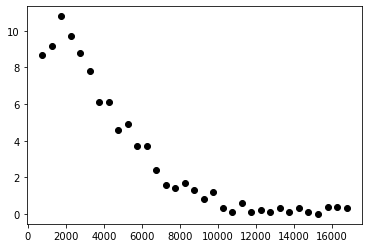

In [53]:
xdata = np.array(walking_data.Distance.iloc[1:])
ydata = np.array(walking_data.Percentage.iloc[1:])
# np.array([2.97280084e-01, 2.30922922e-01, 1.22097177e-01, 9.55543126e-02,
#        6.43664467e-02, 4.67154417e-02, 3.45057240e-02, 2.31302106e-02,
#        2.02389343e-02, 1.35663530e-02, 1.30060037e-02, 8.92805446e-03,
#        8.18404992e-03, 4.90022116e-03, 3.03347024e-03, 2.47733403e-03,
#        2.82017937e-03, 2.02974847e-03, 1.17968287e-03, 1.67639145e-03,
#        3.98142969e-04, 1.26394593e-04, 7.23896308e-04, 1.15403759e-04,
#        2.21190538e-04, 1.06171458e-04, 3.06263822e-04, 9.83069060e-05,
#        2.84387835e-04, 9.15271194e-05, 0.00000000e+00, 3.42488576e-04,
#        3.31785808e-04, 2.41298769e-04]) [:]#np.array(walking_data.Percentage.iloc[1:])

plt.plot(xdata, ydata, "ko")

#### Specify the Function to fit
Define the curve you wish to fit the data to here.

In [54]:
def impedance_function_fit(xdata, A = 1, a = 1, b = 1):
    '''Define the impedance function mathematically'''
    
    ydata = []
    for x in xdata:
        if x <= a:
            f = A*1
        else:
            f = A*np.exp((-(x-a)**2)/b**2)
        
        ydata.append(f)
    
    return ydata

#### Run optimisation
Set results equal to the parameters that we want to find. This defines the curve we want to use

In [55]:
A, a, b = scipy.optimize.curve_fit(impedance_function_fit, xdata/1000, ydata)[0] 
    #in this case the /1000 was needed as the exponential curve was too small at high x values

#### Plot results

In [64]:
#set the range of x values to plot over
xrange_start = 0
xrange_end = 50

x_values = np.linspace(xrange_start, xrange_end, 1000) #gives 1000 x data points

#set the parameters equal to the found ones above here
y_values = impedance_function_fit(x_values, A = A, a = a/0.3, b = b/0.3)

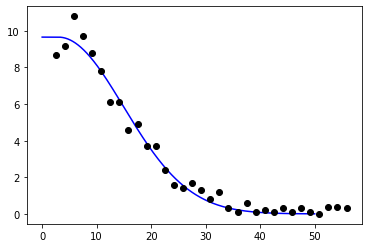

In [65]:
plt.plot(x_values, y_values, "b-", xdata/1000/0.3, ydata, "ko")

#### Plot residuals
Finds the differences between the fit curve and the data

In [59]:
#rempve /1000, change parameters here
residuals = ydata - impedance_function_fit(xdata/1000, A = A, a = a, b = b) 

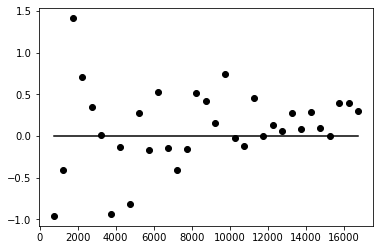

In [60]:
plt.plot(xdata, residuals, "ko", xdata, [0]*len(xdata), "k-")

#### Calculating R^2 value

In [61]:
def calculate_r_squared(residuals, ydata):
    '''Calculates the r-squared value from the residual data found above
    '''
    
    #find the residual sum of squares
    ss_res = np.sum(residuals**2)
    
    #find the total sum of squares
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    
    #evaluate r_squared using the required formula
    r_squared = 1 - ss_res/ss_tot
    
    
    return r_squared

In [62]:
print("The R^2 value is ", calculate_r_squared(residuals, ydata))

The R^2 value is  0.979921600317235


In [63]:
print("A =", A, ", a =", a, ", b =",b)

A = 9.659729556601262 , a = 0.8918821039050062 , b = 5.075387409670461
